# Chi-Square Test

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## Chi-Square Distribution

In [20]:
# generate a sample of 100 numbers from a standard normal distribution
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

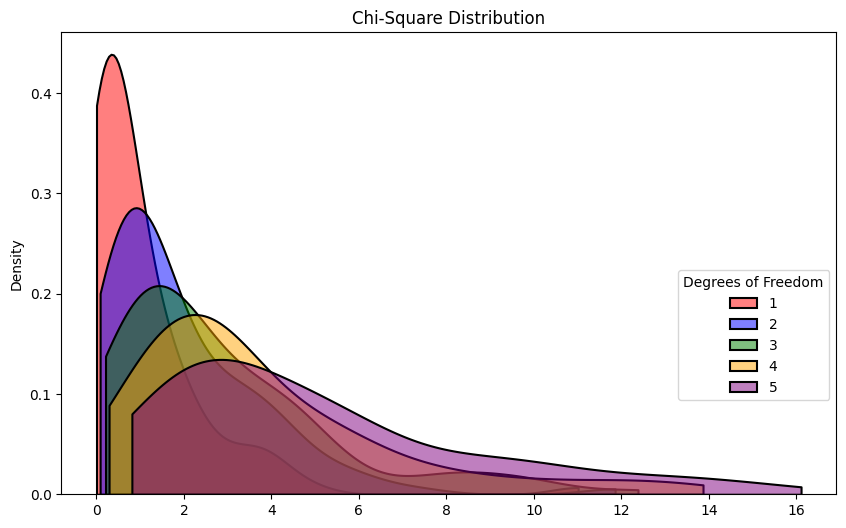

In [27]:
x1 = sample1 ** 2
x2 = sample1**2 + sample2**2
x3 = sample1**2 + sample2**2 + sample3**2
x4 = sample1**2 + sample2**2 + sample3**2 + sample4**2
x5 = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

# plot the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(x1, clip=(x1.min(), x1.max()), fill=True, color='red', alpha=0.5, linewidth=1.5, edgecolor='black', label='1')
sns.kdeplot(x2, clip=(x2.min(), x2.max()), fill=True, color='blue', alpha=0.5, linewidth=1.5, edgecolor='black', label='2')
sns.kdeplot(x3, clip=(x3.min(), x3.max()), fill=True, color='green', alpha=0.5, linewidth=1.5, edgecolor='black', label='3')
sns.kdeplot(x4, clip=(x4.min(), x4.max()), fill=True, color='orange', alpha=0.5, linewidth=1.5, edgecolor='black', label='4')
sns.kdeplot(x5, clip=(x5.min(), x5.max()), fill=True, color='purple', alpha=0.5, linewidth=1.5, edgecolor='black', label='5')
plt.title('Chi-Square Distribution')
plt.legend(title="Degrees of Freedom", loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

## Chi-Square Goodness of Fit Test

In [2]:
# load the titanic dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# count passengers in each class
df["pclass"].value_counts().sort_index()

pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [7]:
# calculate the expected counts assuming a uniform distribution
total_passengers = df["pclass"].count()
expected_counts = total_passengers / 3
expected = [expected_counts] * 3
print("Expected passenger counts assuming a uniform distribution: \n{}".format(expected))

Expected passenger counts assuming a uniform distribution: 
[297.0, 297.0, 297.0]


In [8]:
# perform the chi-square Goodness of Fit test
chi2, p_value = stats.chisquare(df["pclass"].value_counts().sort_index(), expected)

# print the results
print("Chi2 Statistic: {:.2f}".format(chi2))
print(f"P-Value: {p_value:.4f}")

Chi2 Statistic: 191.80
P-Value: 0.0000


In [9]:
# Interpret the results
if p_value <= 0.05:
    print("The test result is statistically significant, we reject the null hypothesis. The distribution of passengers in each class is not uniform.")
else:
    print("The test result is not statistically significant, we fail to reject the null hypothesis. Didn't find enough evidence to claim that the distribution of passengers in each class is not uniform.")

The test result is statistically significant, we reject the null hypothesis. The distribution of passengers in each class is not uniform.


## Test for Independence

In [16]:
# Contingency Table (observed data)
contingency_table = pd.crosstab(df["survived"], df["pclass"])
contingency_table

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


In [19]:
# Interpret the results
if p_value <= 0.05:
    print("The test result is statistically significant, we reject the null hypothesis. Survival and the pclass variables are not independent.")
else:  
    print("The test result is not statistically significant, we fail to reject the null hypothesis. Survival and the pclass variables are independent.")

The test result is statistically significant, we reject the null hypothesis. Survival and the pclass variables are not independent.
